In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

df = pd.read_csv("../data/clean_one_hot_emp_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

In [3]:
df.head()

,age,attrition,business_travel,daily_rate,distance_from_home,education,environment_satisfaction,gender,hourly_rate,job_involvement,...,job_role_sales representative,department_research & development,department_sales,education_field_life sciences,education_field_marketing,education_field_medical,education_field_other,education_field_technical degree,marital_status_married,marital_status_single
0,41,1,1,1102,1,2,2,0,94,3,...,0,0,1,1,0,0,0,0,0,1
1,49,0,2,279,8,1,3,1,61,2,...,0,1,0,1,0,0,0,0,1,0
2,37,1,1,1373,2,2,4,1,92,2,...,0,1,0,0,0,0,1,0,0,1
3,33,0,2,1392,3,4,4,0,56,3,...,0,1,0,1,0,0,0,0,1,0
4,27,0,1,591,2,1,1,1,40,3,...,0,1,0,0,0,1,0,0,1,0


In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
gb = GradientBoostingClassifier(random_state = 42)

In [5]:
y = df.attrition
X = df.drop('attrition',axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [8]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [9]:
y_pred = gb.predict(X_test)

In [10]:
cm = confusion_matrix(y_test, y_pred)
print('The confusion Matrix : \n',cm)

The confusion Matrix : 
 [[311   9]
 [ 33  15]]


In [11]:
cm.ravel()

array([311,   9,  33,  15])

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve


In [13]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8858695652173914
Confusion Matrix: 
[[311   9]
 [ 33  15]]
Area Under Curve: 0.6421875
Recall score: 0.3125


In [14]:
df.describe()

,age,attrition,business_travel,daily_rate,distance_from_home,education,environment_satisfaction,gender,hourly_rate,job_involvement,...,job_role_sales representative,department_research & development,department_sales,education_field_life sciences,education_field_marketing,education_field_medical,education_field_other,education_field_technical degree,marital_status_married,marital_status_single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,9.192517,2.912925,2.721769,0.600000,65.891156,2.729932,...,0.056463,0.653741,0.303401,0.412245,0.108163,0.315646,0.055782,0.089796,0.457823,0.319728
std,9.135373,0.367863,0.532170,403.509100,8.106864,1.024165,1.093082,0.490065,20.329428,0.711561,...,0.230891,0.475939,0.459884,0.492406,0.310692,0.464931,0.229579,0.285986,0.498387,0.466530
min,18.000000,0.000000,0.000000,102.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,2.000000,2.000000,2.000000,0.000000,48.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,1.000000,802.000000,7.000000,3.000000,3.000000,1.000000,66.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1.000000,1157.000000,14.000000,4.000000,4.000000,1.000000,83.750000,3.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,60.000000,1.000000,2.000000,1499.000000,29.000000,5.000000,4.000000,1.000000,100.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

import matplotlib.pyplot as plt
plt.style.use("ggplot")

df = pd.read_csv("../data/clean_one_hot_emp_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

y = df.attrition
X = df.drop('attrition',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

num_estimators = [100, 200,500,1000]
learn_rates = [0.01, 0.05, 0.10]
max_depths = [1, 2, 3]
min_samples_leaf = [1, 5,10]
min_samples_split = [2, 5,10]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

gb = GradientBoostingClassifier(random_state=42)

gb_random_search = RandomizedSearchCV(gb, param_distributions = param_grid, random_state=42)

gb_random_search.fit(X_train, y_train)

gb_random_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 1,
 'learning_rate': 0.1}

In [7]:
gb_optimal = GradientBoostingClassifier(n_estimators= 1000, min_samples_split = 2, min_samples_leaf = 1,
                                         max_depth = 1, learning_rate = 0.1)

In [8]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [9]:
gb_optimal.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, n_estimators=1000)

In [10]:
y_pred = gb_optimal.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve

cm = confusion_matrix(y_test, y_pred)
print('The confusion Matrix : \n',cm)

The confusion Matrix : 
 [[306  14]
 [ 30  18]]


In [52]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8804347826086957
Confusion Matrix: 
[[306  14]
 [ 30  18]]
Area Under Curve: 0.665625
Recall score: 0.375


In [32]:
X_train

,age,business_travel,daily_rate,distance_from_home,education,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,...,job_role_sales representative,department_research & development,department_sales,education_field_life sciences,education_field_marketing,education_field_medical,education_field_other,education_field_technical degree,marital_status_married,marital_status_single
1343,29,1,592,7,3,4,1,59,3,1,...,0,1,0,1,0,0,0,0,0,1
1121,36,1,884,1,4,2,0,73,3,2,...,0,0,1,1,0,0,0,0,0,1
1048,34,1,1326,3,3,4,1,81,1,2,...,0,0,1,0,0,0,1,0,0,1
1393,27,1,954,9,3,4,1,44,3,2,...,0,0,1,0,1,0,0,0,0,1
527,32,1,929,10,3,4,1,55,3,2,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,1,750,28,3,2,1,46,4,2,...,0,1,0,1,0,0,0,0,1,0
1294,41,1,447,5,3,2,1,85,4,2,...,0,1,0,1,0,0,0,0,0,1
860,22,2,1256,3,4,3,1,48,2,1,...,0,1,0,1,0,0,0,0,1,0
1459,29,1,1378,13,2,4,1,46,2,2,...,0,1,0,0,0,0,1,0,1,0


In [33]:
X_test

,age,business_travel,daily_rate,distance_from_home,education,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,...,job_role_sales representative,department_research & development,department_sales,education_field_life sciences,education_field_marketing,education_field_medical,education_field_other,education_field_technical degree,marital_status_married,marital_status_single
1041,28,1,866,5,3,4,1,84,3,2,...,0,0,1,0,0,1,0,0,0,1
184,53,1,1084,13,2,4,0,57,4,2,...,0,1,0,0,0,1,0,0,0,0
1222,24,1,240,22,1,4,1,58,1,1,...,0,0,0,0,0,0,0,0,1,0
67,45,1,1339,7,3,2,1,59,3,3,...,0,1,0,1,0,0,0,0,0,0
220,36,1,1396,5,2,4,1,62,3,2,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,26,2,575,1,2,1,0,71,1,1,...,0,1,0,1,0,0,0,0,0,0
1163,37,1,1470,10,3,2,0,71,3,1,...,0,1,0,0,0,1,0,0,1,0
243,40,1,1300,24,2,1,1,62,3,2,...,0,1,0,0,0,0,0,1,0,0
1411,25,1,309,2,3,3,0,82,3,1,...,0,0,0,0,0,0,0,0,1,0


In [31]:
y_train

1343    0
1121    0
1048    0
1393    0
527     0
       ..
1130    0
1294    0
860     1
1459    0
1126    0
Name: attrition, Length: 1102, dtype: int64

In [22]:
y_test

1041    0
184     0
1222    1
67      0
220     0
       ..
571     0
1163    0
243     0
1411    0
1370    0
Name: attrition, Length: 368, dtype: int64

In [23]:
y_test.describe()

count    368.000000
mean       0.130435
std        0.337240
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: attrition, dtype: float64

In [24]:
y_test = pd.Series(y_test)

In [25]:
y_test.value_counts()

0    320
1     48
Name: attrition, dtype: int64

In [26]:
df.head()

,age,attrition,business_travel,daily_rate,distance_from_home,education,environment_satisfaction,gender,hourly_rate,job_involvement,...,job_role_sales representative,department_research & development,department_sales,education_field_life sciences,education_field_marketing,education_field_medical,education_field_other,education_field_technical degree,marital_status_married,marital_status_single
0,41,1,1,1102,1,2,2,0,94,3,...,0,0,1,1,0,0,0,0,0,1
1,49,0,2,279,8,1,3,1,61,2,...,0,1,0,1,0,0,0,0,1,0
2,37,1,1,1373,2,2,4,1,92,2,...,0,1,0,0,0,0,1,0,0,1
3,33,0,2,1392,3,4,4,0,56,3,...,0,1,0,1,0,0,0,0,1,0
4,27,0,1,591,2,1,1,1,40,3,...,0,1,0,0,0,1,0,0,1,0


In [27]:
df.attrition.value_counts()

0    1233
1     237
Name: attrition, dtype: int64

In [28]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()

In [30]:
tn

306

In [31]:
fp

14

In [32]:
fn

30

In [33]:
tp

18

In [34]:
print(tp,fp,fn,tn)

18 14 30 306


In [30]:
print(thresh_list_new)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.  ]


In [35]:
y_pred_0percent = gb_optimal.predict_proba(X_test)[:,1] >0
print(confusion_matrix(y_test, y_pred_0percent))
# (tn, fp, fn, tp)

[[  0 320]
 [  0  48]]


In [12]:
thresh_list_desc = np.linspace(1,.01,100)
thresh_list_desc = list(thresh_list_desc)
thresh_list_desc.append(0.0)
print(thresh_list_desc)

[1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.9299999999999999, 0.92, 0.91, 0.9, 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.8200000000000001, 0.81, 0.8, 0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7, 0.69, 0.6799999999999999, 0.6699999999999999, 0.6599999999999999, 0.6499999999999999, 0.64, 0.63, 0.62, 0.61, 0.6, 0.59, 0.5800000000000001, 0.5700000000000001, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5, 0.49, 0.48, 0.47, 0.45999999999999996, 0.44999999999999996, 0.43999999999999995, 0.42999999999999994, 0.42000000000000004, 0.41000000000000003, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.33999999999999997, 0.32999999999999996, 0.31999999999999995, 0.30999999999999994, 0.29999999999999993, 0.29000000000000004, 0.28, 0.27, 0.26, 0.25, 0.24, 0.22999999999999998, 0.21999999999999997, 0.20999999999999996, 0.19999999999999996, 0.18999999999999995, 0.17999999999999994, 0.16999999999999993, 0.16000000000000003, 0.15000000000000002, 0.14, 0.13, 0.12, 0.10999999999999999, 0.09999999999999998, 0.0

In [34]:
y_pred_2percent = gb_optimal.predict_proba(X_test)[:, 1] > .02
print(confusion_matrix(y_test, y_pred_2percent))


[[ 99 221]
 [  3  45]]


In [13]:
import numpy as np
# thresh_list_new = np.linspace(.01,1,100)
# (tn, fp, fn, tp)

cm_list_desc = []
for i in thresh_list_desc:
    y_pred = gb_optimal.predict_proba(X_test)[:, 1] > i
    print(confusion_matrix(y_test, y_pred))
    cm_list_desc.append((confusion_matrix(y_test, y_pred)[0][1], confusion_matrix(y_test, y_pred)[1][0], confusion_matrix(y_test,y_pred)[1][1]))

[[320   0]
 [ 48   0]]
[[320   0]
 [ 48   0]]
[[320   0]
 [ 48   0]]
[[320   0]
 [ 48   0]]
[[320   0]
 [ 48   0]]
[[320   0]
 [ 47   1]]
[[320   0]
 [ 47   1]]
[[320   0]
 [ 47   1]]
[[320   0]
 [ 47   1]]
[[320   0]
 [ 47   1]]
[[320   0]
 [ 47   1]]
[[320   0]
 [ 47   1]]
[[320   0]
 [ 47   1]]
[[320   0]
 [ 47   1]]
[[320   0]
 [ 47   1]]
[[320   0]
 [ 46   2]]
[[320   0]
 [ 46   2]]
[[320   0]
 [ 46   2]]
[[320   0]
 [ 46   2]]
[[319   1]
 [ 46   2]]
[[319   1]
 [ 45   3]]
[[319   1]
 [ 43   5]]
[[319   1]
 [ 43   5]]
[[318   2]
 [ 43   5]]
[[318   2]
 [ 43   5]]
[[318   2]
 [ 43   5]]
[[318   2]
 [ 41   7]]
[[318   2]
 [ 41   7]]
[[318   2]
 [ 41   7]]
[[317   3]
 [ 41   7]]
[[316   4]
 [ 40   8]]
[[315   5]
 [ 40   8]]
[[315   5]
 [ 40   8]]
[[315   5]
 [ 40   8]]
[[315   5]
 [ 39   9]]
[[315   5]
 [ 38  10]]
[[315   5]
 [ 38  10]]
[[315   5]
 [ 38  10]]
[[315   5]
 [ 36  12]]
[[314   6]
 [ 36  12]]
[[314   6]
 [ 36  12]]
[[313   7]
 [ 34  14]]
[[312   8]
 [ 34  14]]
[[310  10]


In [14]:
#THIS IS COST BENEFIT MATRIX THAT KAYLA AND I PUT TOGETHER 5k (TP), 5k (FP) and 30k (FN)
profit_list = []
for i in range(len(cm_list_desc)):
    profit = (cm_list_desc[i][2]*7000) + (cm_list_desc[i][1]*25000) + (cm_list_desc[i][0]*7000)
    profit_list.append(profit)
    
# (tn, fp, fn, tp)

In [15]:
print(cm_list_desc)
# (fp, fn, tp)

[(0, 48, 0), (0, 48, 0), (0, 48, 0), (0, 48, 0), (0, 48, 0), (0, 47, 1), (0, 47, 1), (0, 47, 1), (0, 47, 1), (0, 47, 1), (0, 47, 1), (0, 47, 1), (0, 47, 1), (0, 47, 1), (0, 47, 1), (0, 46, 2), (0, 46, 2), (0, 46, 2), (0, 46, 2), (1, 46, 2), (1, 45, 3), (1, 43, 5), (1, 43, 5), (2, 43, 5), (2, 43, 5), (2, 43, 5), (2, 41, 7), (2, 41, 7), (2, 41, 7), (3, 41, 7), (4, 40, 8), (5, 40, 8), (5, 40, 8), (5, 40, 8), (5, 39, 9), (5, 38, 10), (5, 38, 10), (5, 38, 10), (5, 36, 12), (6, 36, 12), (6, 36, 12), (7, 34, 14), (8, 34, 14), (10, 32, 16), (11, 31, 17), (11, 31, 17), (12, 31, 17), (13, 31, 17), (13, 30, 18), (13, 30, 18), (14, 30, 18), (14, 29, 19), (14, 29, 19), (15, 27, 21), (15, 27, 21), (17, 27, 21), (18, 27, 21), (18, 27, 21), (18, 27, 21), (20, 26, 22), (20, 26, 22), (21, 26, 22), (24, 25, 23), (24, 25, 23), (26, 25, 23), (26, 25, 23), (31, 25, 23), (35, 25, 23), (37, 24, 24), (38, 24, 24), (40, 23, 25), (40, 23, 25), (42, 23, 25), (44, 20, 28), (48, 19, 29), (50, 17, 31), (53, 17, 31),

In [16]:
results = zip(thresh_list_desc, profit_list)

In [17]:
results = list(results)

In [18]:
percent_of_test_instances = []
for i in range(101):
    percent_of_test_instances.append(i)
print(percent_of_test_instances)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [19]:
new_results = zip(percent_of_test_instances, profit_list)

In [20]:
new_results = list(new_results)

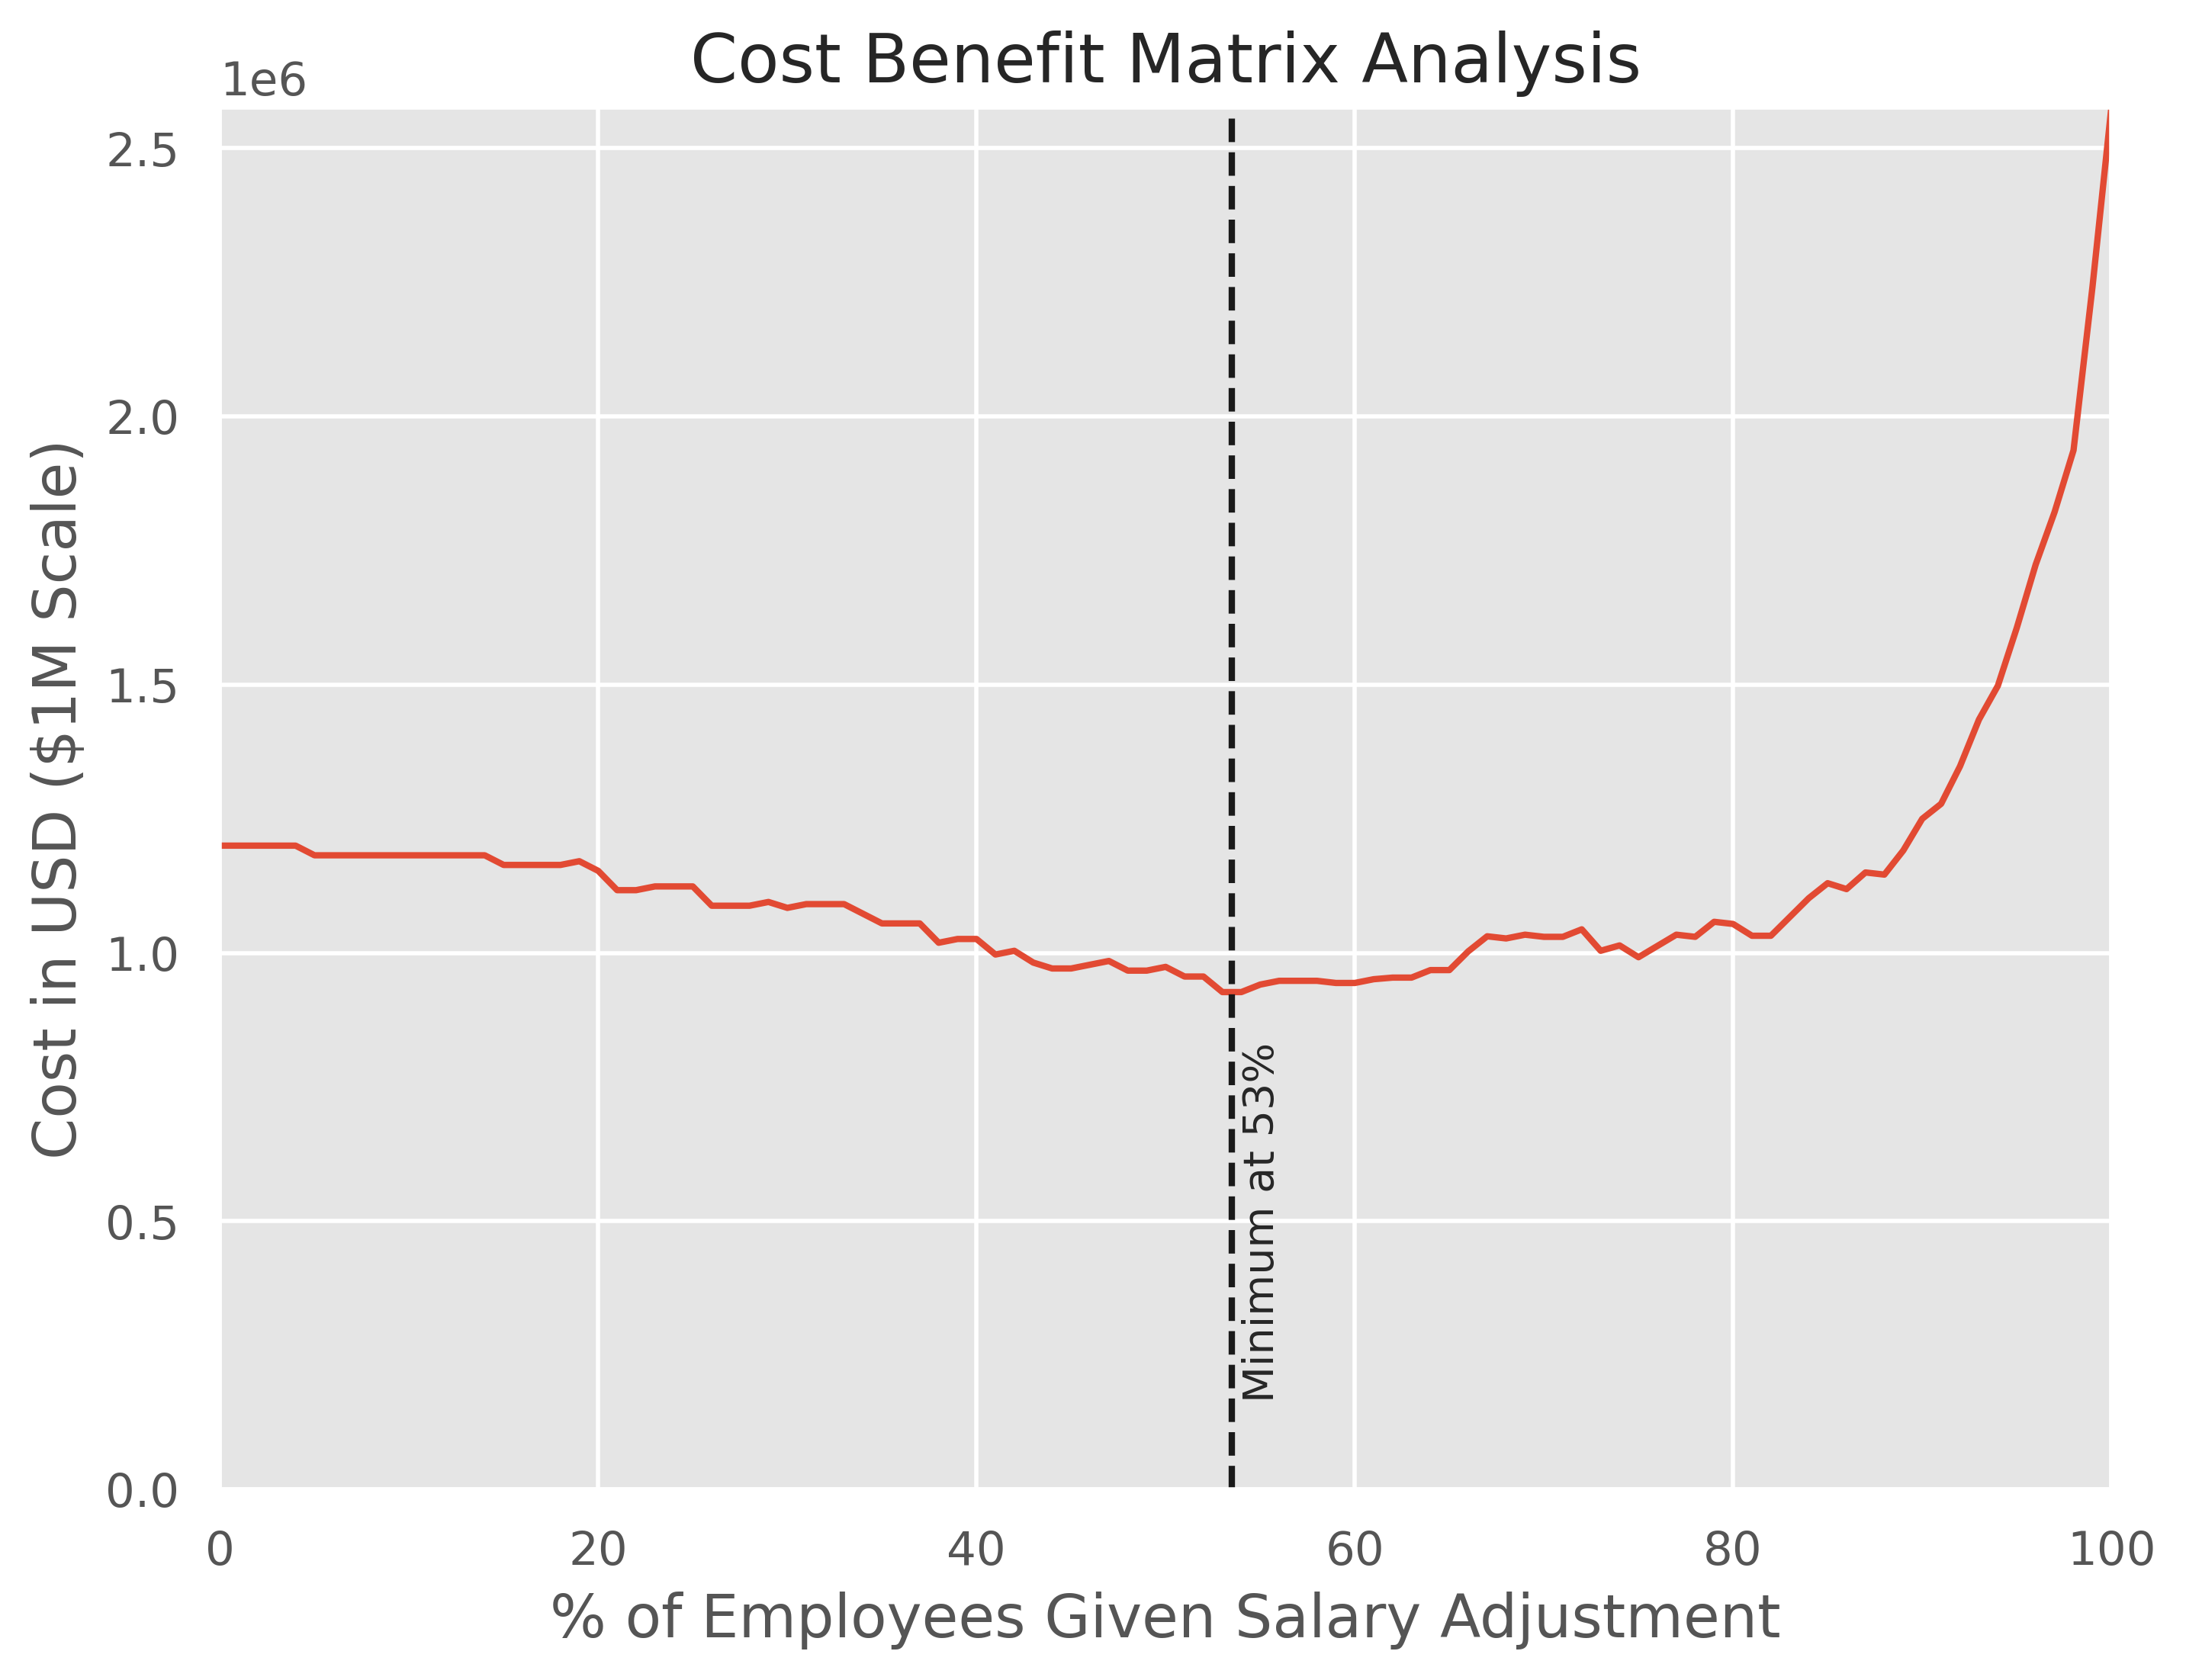

In [41]:
import seaborn as sns
import pandas as pd
sns.set(rc={"figure.dpi":400, 'savefig.dpi':400})
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title("Cost Benefit Matrix Analysis", fontsize=16)
ax.set_xlabel('% of Employees Given Salary Adjustment', fontsize=14)
ax.set_ylabel('Cost in USD ($1M Scale)', fontsize=14)
ax.plot(percent_of_test_instances, profit_list)
ax.set_ylim(-10,2576000)
ax.set_xlim(-.01,100)
plt.axvline(x=53.5, color='k', ls='--')
plt.text(54,180000, 'Minimum at 53%', rotation = 90)
# ax.set_ylim(-8415000, -200000, 100000)
plt.show()

In [78]:
new_results

[(0, 1200000),
 (1, 1200000),
 (2, 1200000),
 (3, 1200000),
 (4, 1200000),
 (5, 1182000),
 (6, 1182000),
 (7, 1182000),
 (8, 1182000),
 (9, 1182000),
 (10, 1182000),
 (11, 1182000),
 (12, 1182000),
 (13, 1182000),
 (14, 1182000),
 (15, 1164000),
 (16, 1164000),
 (17, 1164000),
 (18, 1164000),
 (19, 1171000),
 (20, 1153000),
 (21, 1117000),
 (22, 1117000),
 (23, 1124000),
 (24, 1124000),
 (25, 1124000),
 (26, 1088000),
 (27, 1088000),
 (28, 1088000),
 (29, 1095000),
 (30, 1084000),
 (31, 1091000),
 (32, 1091000),
 (33, 1091000),
 (34, 1073000),
 (35, 1055000),
 (36, 1055000),
 (37, 1055000),
 (38, 1019000),
 (39, 1026000),
 (40, 1026000),
 (41, 997000),
 (42, 1004000),
 (43, 982000),
 (44, 971000),
 (45, 971000),
 (46, 978000),
 (47, 985000),
 (48, 967000),
 (49, 967000),
 (50, 974000),
 (51, 956000),
 (52, 956000),
 (53, 927000),
 (54, 927000),
 (55, 941000),
 (56, 948000),
 (57, 948000),
 (58, 948000),
 (59, 944000),
 (60, 944000),
 (61, 951000),
 (62, 954000),
 (63, 954000),
 (64, 96

In [70]:
profit_list

[1200000,
 1200000,
 1200000,
 1200000,
 1200000,
 1182000,
 1182000,
 1182000,
 1182000,
 1182000,
 1182000,
 1182000,
 1182000,
 1182000,
 1182000,
 1164000,
 1164000,
 1164000,
 1164000,
 1171000,
 1153000,
 1117000,
 1117000,
 1124000,
 1124000,
 1124000,
 1088000,
 1088000,
 1088000,
 1095000,
 1084000,
 1091000,
 1091000,
 1091000,
 1073000,
 1055000,
 1055000,
 1055000,
 1019000,
 1026000,
 1026000,
 997000,
 1004000,
 982000,
 971000,
 971000,
 978000,
 985000,
 967000,
 967000,
 974000,
 956000,
 956000,
 927000,
 927000,
 941000,
 948000,
 948000,
 948000,
 944000,
 944000,
 951000,
 954000,
 954000,
 968000,
 968000,
 1003000,
 1031000,
 1027000,
 1034000,
 1030000,
 1030000,
 1044000,
 1004000,
 1014000,
 992000,
 1013000,
 1034000,
 1030000,
 1058000,
 1054000,
 1032000,
 1032000,
 1067000,
 1102000,
 1130000,
 1119000,
 1150000,
 1146000,
 1191000,
 1250000,
 1278000,
 1348000,
 1435000,
 1498000,
 1606000,
 1724000,
 1822000,
 1937000,
 2241000,
 2576000]

In [64]:
list(results)

[(1.0, 1200000),
 (0.99, 1200000),
 (0.98, 1200000),
 (0.97, 1200000),
 (0.96, 1200000),
 (0.95, 1182000),
 (0.94, 1182000),
 (0.9299999999999999, 1182000),
 (0.92, 1182000),
 (0.91, 1182000),
 (0.9, 1182000),
 (0.89, 1182000),
 (0.88, 1182000),
 (0.87, 1182000),
 (0.86, 1182000),
 (0.85, 1164000),
 (0.84, 1164000),
 (0.83, 1164000),
 (0.8200000000000001, 1164000),
 (0.81, 1171000),
 (0.8, 1153000),
 (0.79, 1117000),
 (0.78, 1117000),
 (0.77, 1124000),
 (0.76, 1124000),
 (0.75, 1124000),
 (0.74, 1088000),
 (0.73, 1088000),
 (0.72, 1088000),
 (0.71, 1095000),
 (0.7, 1084000),
 (0.69, 1091000),
 (0.6799999999999999, 1091000),
 (0.6699999999999999, 1091000),
 (0.6599999999999999, 1073000),
 (0.6499999999999999, 1055000),
 (0.64, 1055000),
 (0.63, 1055000),
 (0.62, 1019000),
 (0.61, 1026000),
 (0.6, 1026000),
 (0.59, 997000),
 (0.5800000000000001, 1004000),
 (0.5700000000000001, 982000),
 (0.56, 971000),
 (0.55, 971000),
 (0.54, 978000),
 (0.53, 985000),
 (0.52, 967000),
 (0.51, 967000),
 

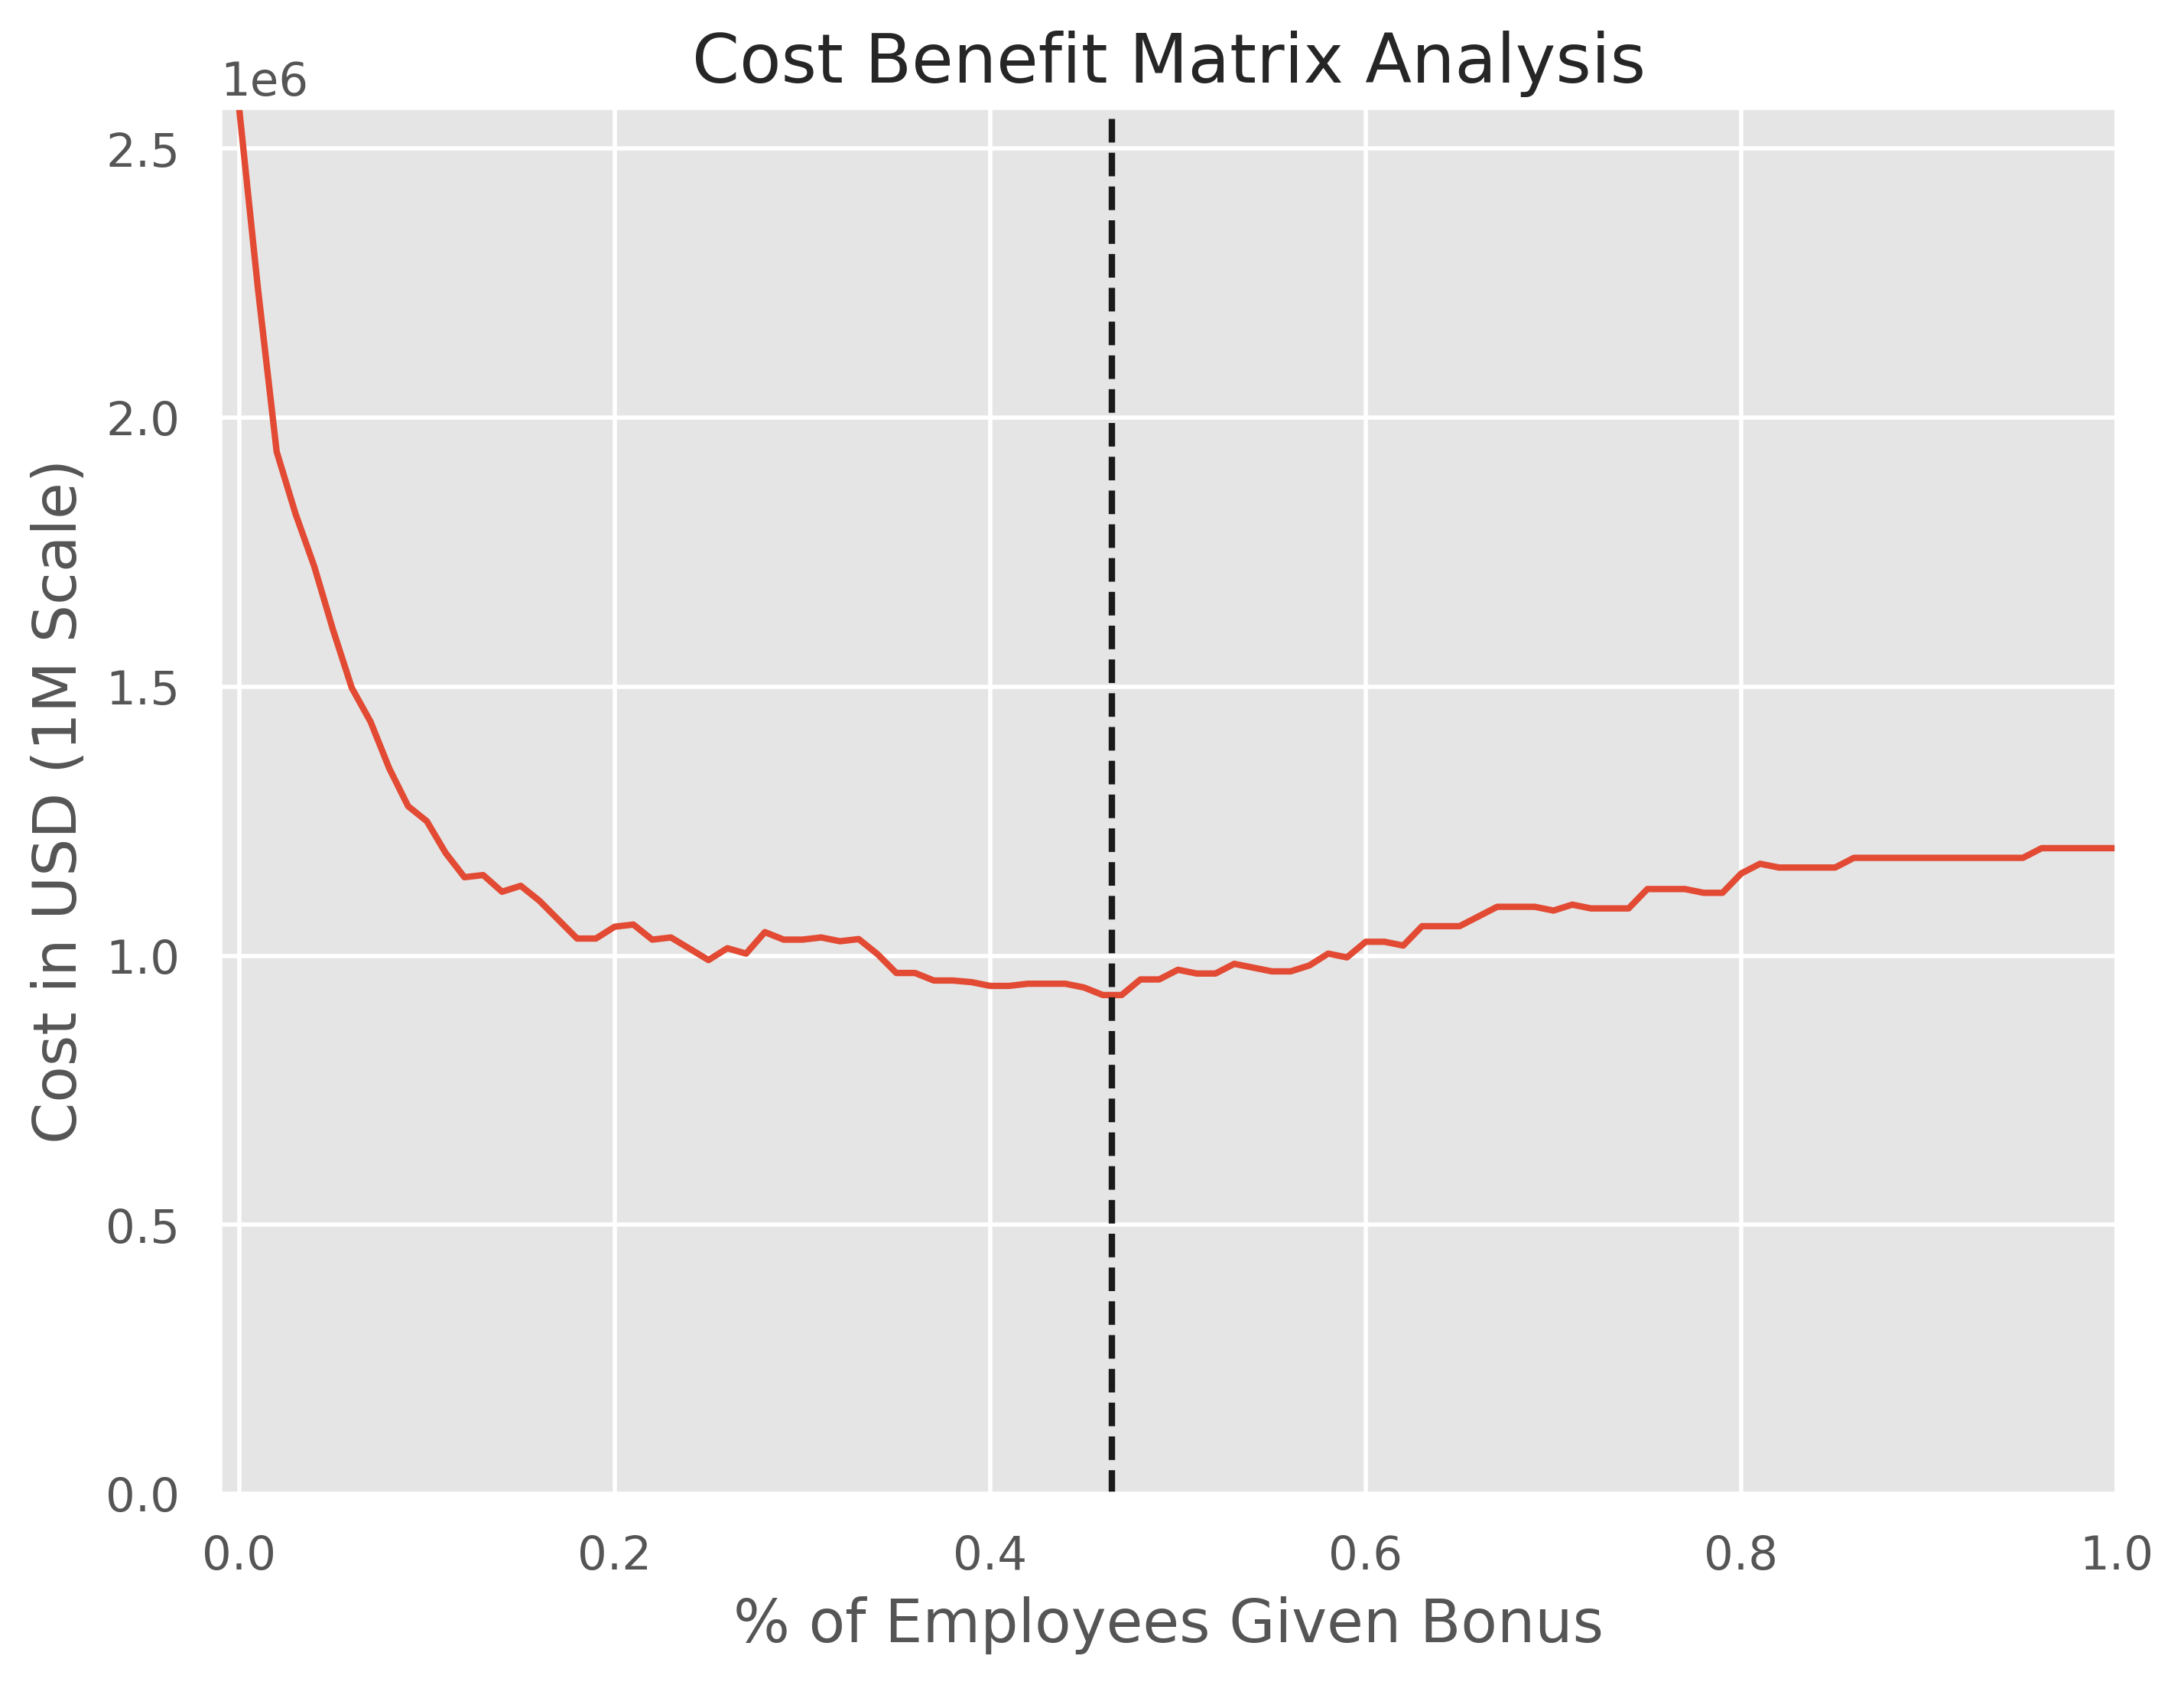

In [69]:
import seaborn as sns
import pandas as pd
sns.set(rc={"figure.dpi":400, 'savefig.dpi':400})
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title("Cost Benefit Matrix Analysis", fontsize=16)
ax.set_xlabel('% of Employees Given Bonus', fontsize=14)
ax.set_ylabel('Cost in USD (1M Scale)', fontsize=14)
ax.plot(thresh_list_desc, profit_list)
ax.set_ylim(-10,2576000)
ax.set_xlim(-.01,1.0)
plt.axvline(x=0.465, color='k', ls='--')
# ax.set_ylim(-8415000, -200000, 100000)
plt.show()

In [ ]:
df.head()

In [ ]:
gb_optimal = GradientBoostingClassifier(n_estimators= 1000, min_samples_split = 2, min_samples_leaf = 1,
                                         max_depth = 1, learning_rate = 0.1)

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)

In [ ]:
gb_optimal.fit(X_train, y_train)

In [ ]:
y_pred = gb_optimal.predict(X_test)

In [ ]:
importances = gb_optimal.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot